# Part 2

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\04 Instacart Project'

In [3]:
df_orders_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products.pkl'))

In [4]:
df_user_stats_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_stats_customers_merged.pkl'))

## Lesson Examples

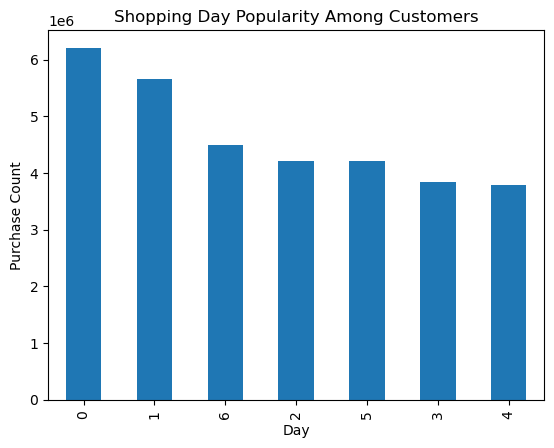

In [5]:
#2.
#Bar chart
bar = df_orders_products['orders_day_of_week'].value_counts().plot.bar()
plt.title('Shopping Day Popularity Among Customers')
plt.xlabel('Day')
plt.ylabel('Purchase Count')
plt.savefig('Shopping Day Popularity Among Customers', bbox_inches='tight', dpi = 1000)

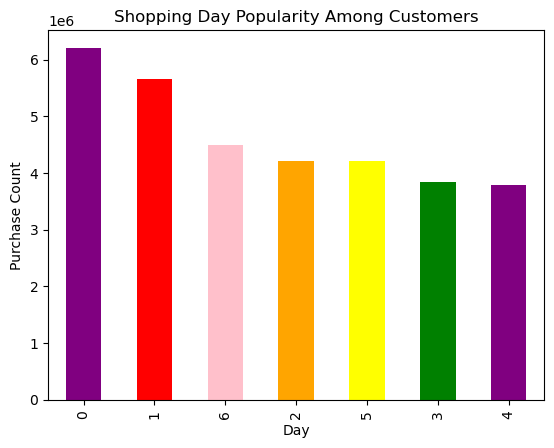

In [6]:
#Bar chart color
bar = df_orders_products['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])
plt.title('Shopping Day Popularity Among Customers')
plt.xlabel('Day')
plt.ylabel('Purchase Count')
plt.savefig('Shopping Day Popularity Among Customers', bbox_inches='tight', dpi = 1000)

In [7]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

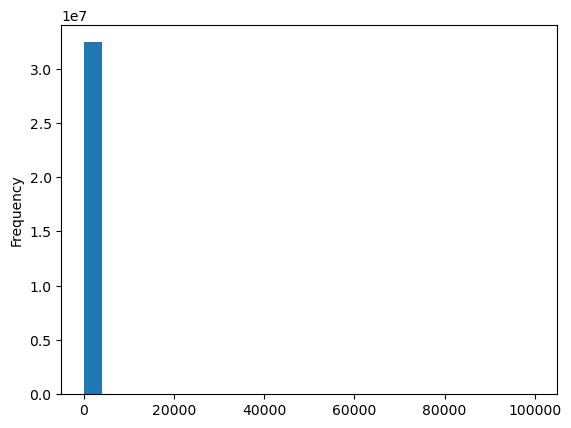

In [8]:
#Histogram
#Only a singular column instead of the expected 25
df_orders_products['prices'].plot.hist(bins = 25)

In [9]:
#A look into the prices column
df_orders_products['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

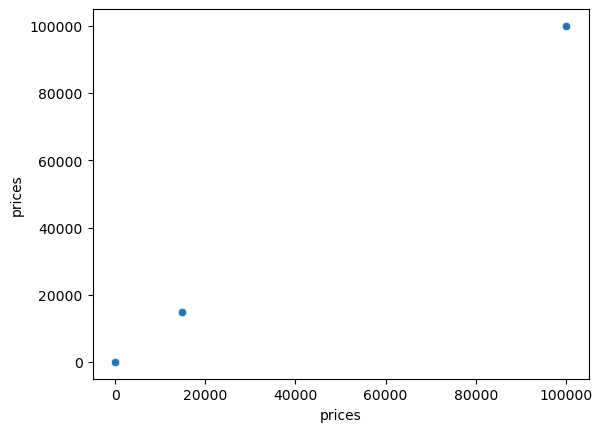

In [10]:
#Prices scatterplot to see data distribution
sns.scatterplot(x = 'prices', y = 'prices',data = df_orders_products)

In [11]:
#Seeing prices outliers 
df_orders_products.loc[df_orders_products['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders,40,Regular customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Average orders,4,New customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest day,Busiest days,Average orders,4,New customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Busiest days,Average orders,16,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,Busiest day,Busiest days,Average orders,39,Regular customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,Busiest day,Busiest days,Most orders,39,Regular customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,Regularly busy,Least busiest days,Most orders,15,Regular customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,Regularly busy,Least busiest days,Average orders,12,Regular customer


In [12]:
#Removing prices outliers by changing them to NaNs
df_orders_products.loc[df_orders_products['prices'] >100, 'prices'] = np.nan

In [13]:
#Checking prices max value
df_orders_products['prices'].max()

25.0

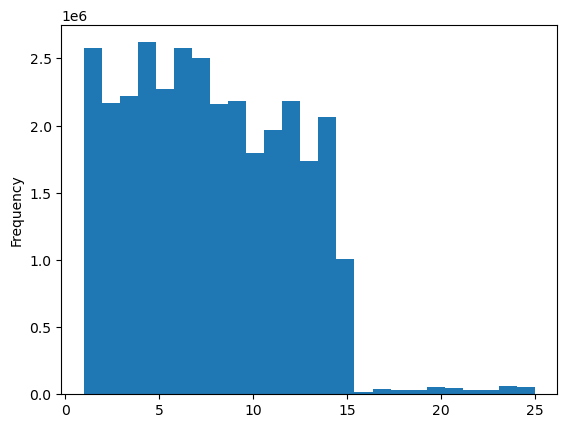

In [14]:
#Generating histogram
hist = df_orders_products['prices'].plot.hist(bins = 25)

hist_2 = df_orders_products['prices'].plot.hist(bins = 70)
plt.title('Price Distribution for Instacart Items')
plt.xlabel('Price')
plt.ylabel('Price Count')
plt.savefig('Price Distribution for Instacart Items', bbox_inches='tight', dpi = 1000)

In [15]:
#Line Charts
#Creating subset 
df = df_orders_products[:2000000]

In [16]:
#Creating random values
#Create a list of holding True/False values to test the np.random.rant() <= 0.7
#Any rows whose assigned number is less than 0.7 are placed in one sample
np.random.seed(4)
dev = np.random.rand(len(df_orders_products)) <= 0.7

In [17]:
#Testing dev
dev

array([False,  True, False, ..., False,  True,  True])

In [18]:
big = df_orders_products[dev]

In [19]:
small = df_orders_products[~dev]

In [20]:
#Testing big and small dataframes
len(df_orders_products)

32434212

In [21]:
len(big) + len(small)

32434212

In [22]:
#Dataframe for only columns needed for line chart
df_2 = small[['orders_day_of_week','prices']]

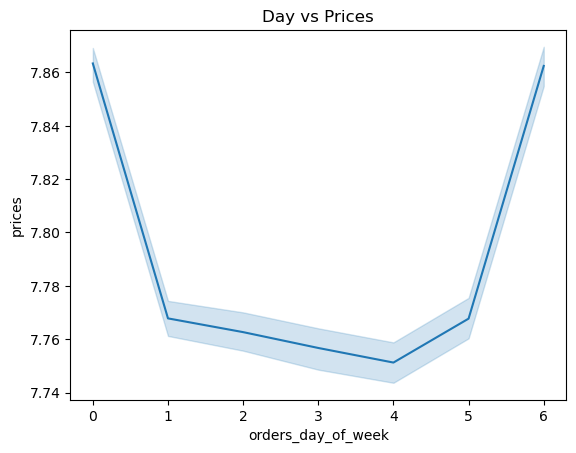

In [23]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices').set(title='Day vs Prices')

## Assignment

## Histogram

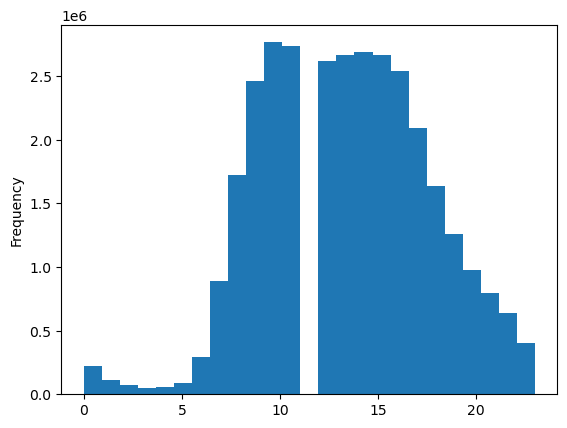

In [24]:
#3.
#Histogram order_hour_of_day
hist_order_hour_of_day = df_orders_products['order_hour_of_day'].plot.hist(bins = 25)

Customers' peak shopping time is from 9:00am to 5:00pm with a drop off during 12:00pm

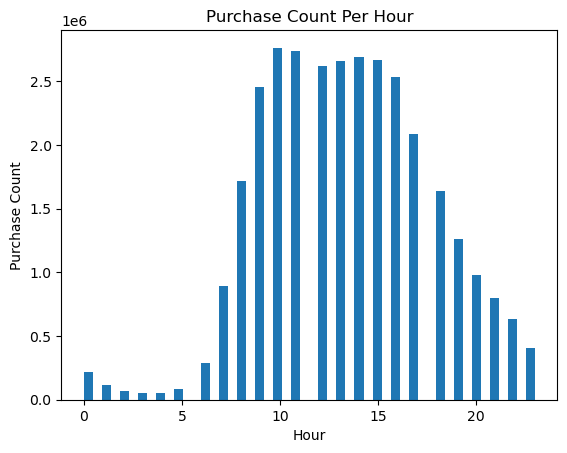

In [25]:
df_orders_products['order_hour_of_day'].plot.hist(bins = 50)
plt.title('Purchase Count Per Hour')
plt.xlabel('Hour')
plt.ylabel('Purchase Count')
plt.savefig('Purchase Count Per Hour', bbox_inches='tight', dpi = 1000)

An additional histogram with 50 bins instead of 25 still shows 12:00pm having low customer activity

## Bar Chart

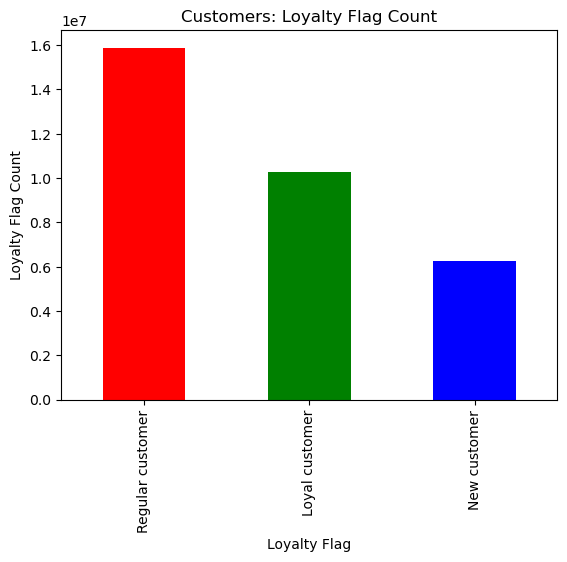

In [26]:
#4.
#Creating bar chart for loyalty flag differing each value with different colors
bar_loyalty_bar = df_orders_products['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])
plt.title('Customers: Loyalty Flag Count')
plt.xlabel('Loyalty Flag')
plt.ylabel('Loyalty Flag Count')
plt.savefig('Customers Loyalty Flag Count', bbox_inches='tight', dpi = 1000)

## Line Chart

In [27]:
#5.
#Dataframe for only columns needed for line chart
df_3 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Prices vs Hour')

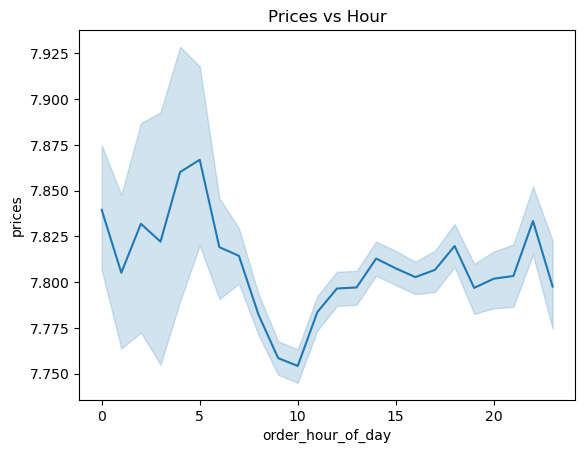

In [28]:
#Generating line chart
line_hour_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices vs Hour')

In [29]:
#6.
dev = np.random.rand(len(df_user_stats_customers)) <= 0.7

In [30]:
small_2 = df_user_stats_customers[~dev]

In [31]:
#Datafrane for neccesary data
df_4 = small_2[['Age','num_dependants']]

Text(0.5, 1.0, 'Age vs Number of Dependents')

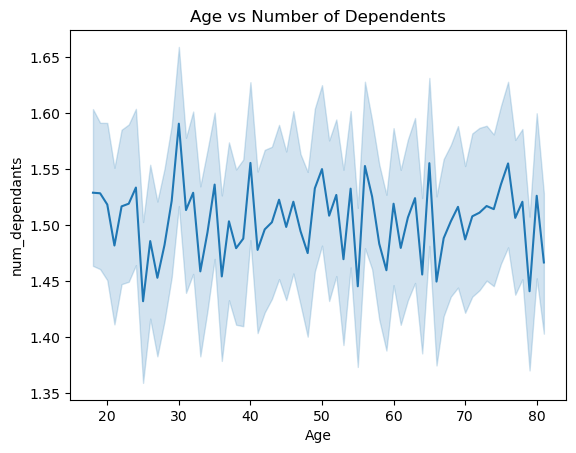

In [32]:
line_age_dependants = sns.lineplot(data = df_4, x = 'Age',y = 'num_dependants')
plt.title('Age vs Number of Dependents')

There is no strong correlation between age or number of dependents.

Text(0.5, 1.0, 'Age vs Income')

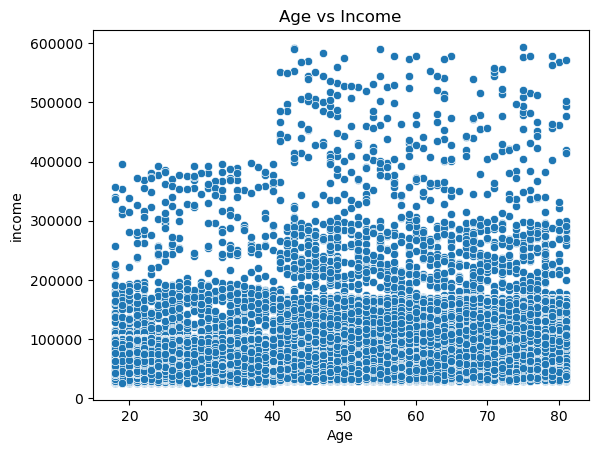

In [33]:
#7.
#Dataframe for scatterplot
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_user_stats_customers)
plt.title('Age vs Income')

There is a positive correlation between age and income.

In [34]:
#8.
#Exporting visualizations
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [35]:
bar_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_bar.png'))

In [36]:
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [37]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [38]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))